In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import numpy as np
from upsetplot import from_contents, UpSet, from_memberships

In [2]:
top_mito = ['Camptothecin', 'DACTINOMYCIN', 'NICLOSAMIDE', 'Parthenolide', 'TENIPOSIDE']

In [3]:
def overlap(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [4]:
def find_gene_set(term, path):
    """
    Extracts a unique set of genes associated with a specific term from multiple GSEA result files
    across different cell types and components, then saves the gene list as a .npy file.

    Args:
        term (str): The keyword to search for in the 'Term' column of GSEA results (case-insensitive).
        path (str): The directory path where the GSEA result CSV files are stored.

    Returns:
        list: A list of unique genes associated with the term across all cell types and components.
    """

    # Initialize an empty set to store unique gene names
    genes = set()

    # Loop over the first 6 cell types 
    for cell_type in [
        'Excitatory Neurons',
        'Oligodendrocytes',
        'Inhibitory Neurons',
        'Astrocyte',
        'Microglia',
        'OPCs'
    ]:
        # Loop over components 1 to 13 (indexing starts at 0 but files are labeled starting from 1)
        for comp in range(0, 13):
            # Load the CSV file corresponding to this cell type and component
            nz_gsea_df_sig = pd.read_csv(f'{path}/{cell_type}_comp_{comp+1}_hits.csv', index_col=0)

            # Select rows where the 'Term' column contains the search keyword (case-insensitive)
            path_rows = nz_gsea_df_sig[nz_gsea_df_sig['Term'].str.contains(term, case=False, na=False)]

            # Loop through the 'Lead_genes' column of filtered rows
            for gene in path_rows.Lead_genes:
                # Split the semicolon-separated list of genes into individual gene names
                geneset = gene.split(';')
                # Add each gene to the set (automatically ensures uniqueness)
                for gene in geneset:
                    genes.add(gene)

    # Save the unique gene set as a NumPy array to a .npy file
    np.save(f'../08.13.25/MT_PLS/perturbations/{term}_gene_list.npy', np.array(list(genes)))

    # Return the unique genes as a list
    return list(genes)


In [5]:
date = '08.13.25'
new_path = f'../{date}/MT_PLS/GO_Molecular'

gene_sets = [
    'Tau protein',
    'Oxidoreduct',
    'NADH Dehydrogenase',
    'p53',
    'cholesterol',
    'calcium',
    'iron',
    'zinc ion binding',
    'mRNA binding',
    'rRNA binding',
    'Amyloid-Beta Binding'
]

for gene in gene_sets:
    find_gene_set(gene, new_path)


In [6]:
date = '08.13.25'

# General top enriched pathways
mRNA_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/mRNA binding_gene_list.npy')]
rRNA_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/rRNA binding_gene_list.npy')]
calcium_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/calcium_gene_list.npy')]
zinc_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/zinc ion binding_gene_list.npy')]
oxy_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/Oxidoreduction_gene_list.npy')]
NADH_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/NADH_gene_list.npy')]
ubi_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/ubi_gene_list.npy')]

# Alzheimer's pathology 
amyloid_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/Amyloid-Beta Binding_gene_list.npy')]
tau_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/Tau protein_gene_list.npy')]

# Drugs
camp_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/Camptothecin_gene_list.npy')]
dac_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/DACTINOMYCIN_gene_list.npy')]
niclo_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/NICLOSAMIDE_gene_list.npy')]
part_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/Parthenolide_gene_list.npy')]
teni_genes = [str(g) for g in np.load(f'../{date}/MT_PLS/perturbations/TENIPOSIDE_gene_list.npy')]



In [7]:
gene_list_dic = {
    'Tau binding': tau_genes,
    r'Amyloid-beta binding': amyloid_genes,
    'Calcium homeostasis': calcium_genes,
    'Zinc ion binding': zinc_genes,
    'mRNA binding': mRNA_genes,
    'rRNA binding': rRNA_genes,

    'Ubiquitin regulation': ubi_genes,
    'Oxidoreduction': oxy_genes,
    'NADH dehydrogenase': NADH_genes,

    'Camptothecin': camp_genes,
    'Dactinomycin': dac_genes,

    'Niclosamide': niclo_genes,
    'Parthenolide': part_genes,
    'Teniposide': teni_genes
}

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<Figure size 2000x1000 with 0 Axes>

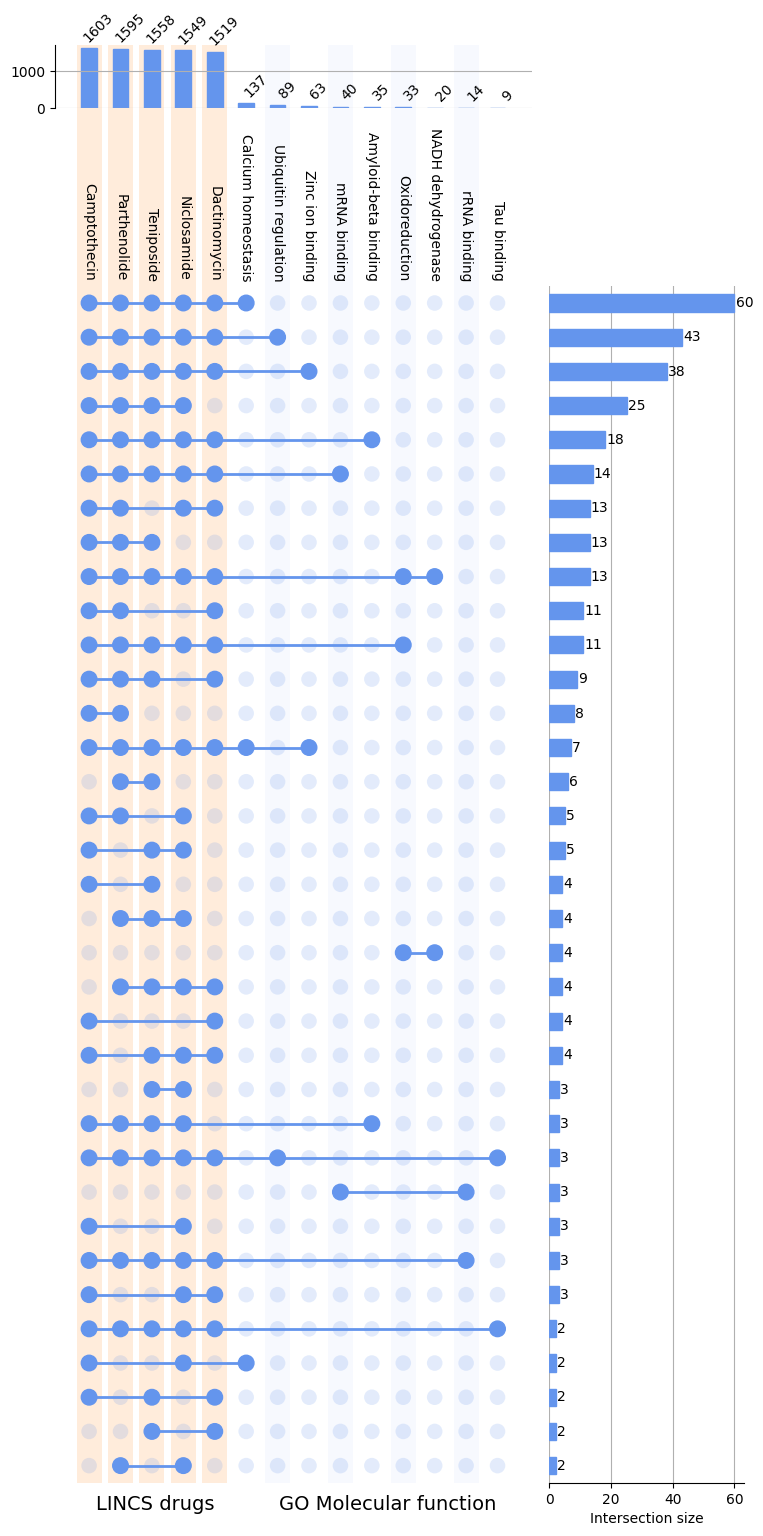

In [9]:
plt.figure(figsize=(20,10))
# Convert to an UpSet-compatible object
upset_data = from_contents(gene_list_dic)

# To plot the UpSet diagram
upset = UpSet(upset_data,
              show_counts=True,
            #   show_percentages=True,
              sort_by='cardinality',
              min_degree=2,
              max_subset_size=60,
              min_subset_size=2,
              orientation='vertical',
              facecolor='cornflowerblue')
# upset.plot()

axes = upset.plot()
totals_ax = axes['totals']

# Change orientation of ticks
for text in totals_ax.texts:
    try:
        int(text.get_text().replace(',', ''))
        text.set_rotation(45)
        text.set_horizontalalignment('center')  # align right for rotation
        text.set_verticalalignment('bottom')   # anchor above the bar
        # optional: nudge it slightly upward if needed
        text.set_y(text.get_position()[1] + 100)
        text.set_x(text.get_position()[0] + 0.3)
    except ValueError:
        pass

# Access the shading axis
shading_ax = axes['shading']

# Each column has a Rectangle patch, let's loop through them
for i, patch in enumerate(shading_ax.patches):
    if i < 5:  # first 5 columns
        patch.set_facecolor("peachpuff")
        patch.set_alpha(0.5) 

matrix_ax = axes['matrix']

# find middle based on drug columns, index 2 
x = totals_ax.texts[2].get_position()[0] - 0.2
y = text.get_position()[1] - 110
matrix_ax.text(x, y, "LINCS drugs",
               ha="center", va="top", fontsize=14, color="black")

# find middle based on GO columns, index 9
x = totals_ax.texts[9].get_position()[0] + 0.2
y = text.get_position()[1] - 110
matrix_ax.text(x, y, "GO Molecular function",
               ha="center", va="top", fontsize=14, color="black")

plt.show()

In [10]:
upset_data.reset_index().set_index('id').to_csv('supplementary_tables/Sup_Fig_3_gene_sets.csv')